In [101]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [114]:
#get the data from the csv file and put it in a dataframe
df = pd.read_csv('/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/Sample_9000_manual.csv')

In [80]:
df.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


## Finding the distribution of the races based on PR rejection reasons

In [61]:
#drop the columns that are not needed
df.drop(['Unnamed: 0', 'repo_id', 'status', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

In [55]:
df.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [6]:
grouped_data = df.groupby(['author_eth', 'manual_analysis']).size().reset_index(name='count')
print(grouped_data)


   author_eth manual_analysis  count
0         API         Chaotic      3
1         API       Duplicate     21
2         API  Merge Conflict      8
3         API       No reason     89
4         API          Not PR      3
5         API         Quality     32
6         API        Replaced     69
7         API        Resolved     76
8         API           Stale     20
9         API      Successful    183
10        API     Unnecessary    118
11      Black         Chaotic      1
12      Black       Duplicate      1
13      Black         Quality      1
14      Black        Replaced      1
15      Black        Resolved      2
16      Black           Stale      1
17      Black      Successful      4
18   Hispanic         Chaotic      2
19   Hispanic       Duplicate      7
20   Hispanic  Merge Conflict      1
21   Hispanic       No reason     34
22   Hispanic         Quality     12
23   Hispanic        Replaced     24
24   Hispanic        Resolved     28
25   Hispanic           Stale      5
2

In [7]:
#how many values in column author_eth has the value 'Black
print(df['author_eth'].value_counts())

author_eth
White       5155
Unknown     2981
API          622
Hispanic     217
Black         11
Name: count, dtype: int64


In [35]:
pivot_table = grouped_data.pivot_table(index='author_eth', columns='manual_analysis', values='count', fill_value=0)
print(pivot_table)


manual_analysis  Chaotic  Duplicate  Merge Conflict  No reason  Not PR   
author_eth                                                               
API                    3         21               8         89       3  \
Black                  1          1               0          0       0   
Hispanic               2          7               1         34       0   
Unknown               18        119              44        543      12   
White                 14        235              51        636       5   

manual_analysis  Quality  Replaced  Resolved  Stale  Successful  Unnecessary  
author_eth                                                                    
API                   32        69        76     20         183          118  
Black                  1         1         2      1           4            0  
Hispanic              12        24        28      5          52           52  
Unknown              167       251       313     91         722          701  
White  

In [36]:
pivot_table['Total'] = pivot_table.sum(axis=1)
for col in pivot_table.columns[:-1]:  # Exclude the 'Total' column
    pivot_table[col] = (pivot_table[col] / pivot_table['Total']) * 100

#make a dataframe of the pivot table
pivot_df = pd.DataFrame(pivot_table)
print(pivot_table)

manual_analysis   Chaotic  Duplicate  Merge Conflict  No reason    Not PR   
author_eth                                                                  
API              0.482315   3.376206        1.286174  14.308682  0.482315  \
Black            9.090909   9.090909        0.000000   0.000000  0.000000   
Hispanic         0.921659   3.225806        0.460829  15.668203  0.000000   
Unknown          0.603824   3.991949        1.476015  18.215364  0.402549   
White            0.271581   4.558681        0.989331  12.337536  0.096993   

manual_analysis   Quality   Replaced   Resolved     Stale  Successful   
author_eth                                                              
API              5.144695  11.093248  12.218650  3.215434   29.421222  \
Black            9.090909   9.090909  18.181818  9.090909   36.363636   
Hispanic         5.529954  11.059908  12.903226  2.304147   23.963134   
Unknown          5.602147   8.419993  10.499832  3.052667   24.220060   
White            5.722

In [38]:
pivot_df

manual_analysis,Chaotic,Duplicate,Merge Conflict,No reason,Not PR,Quality,Replaced,Resolved,Stale,Successful,Unnecessary,Total
author_eth,,,,,,,,,,,,
API,0.482315,3.376206,1.286174,14.308682,0.482315,5.144695,11.093248,12.218650,3.215434,29.421222,18.971061,622
Black,9.090909,9.090909,0.000000,0.000000,0.000000,9.090909,9.090909,18.181818,9.090909,36.363636,0.000000,11
Hispanic,0.921659,3.225806,0.460829,15.668203,0.000000,5.529954,11.059908,12.903226,2.304147,23.963134,23.963134,217
Unknown,0.603824,3.991949,1.476015,18.215364,0.402549,5.602147,8.419993,10.499832,3.052667,24.220060,23.515599,2981
White,0.271581,4.558681,0.989331,12.337536,0.096993,5.722599,9.796314,12.065955,3.064985,29.738118,21.357905,5155


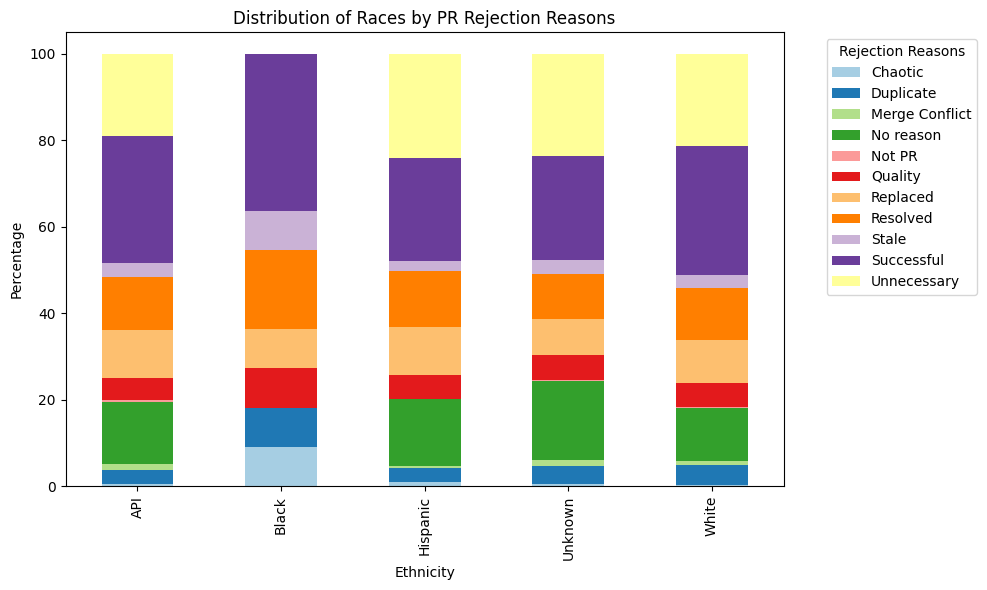

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
# remove the total column
pivot_table = pivot_table.drop('Total', axis=1)
custom_palette = sns.color_palette("Paired", n_colors=len(df['manual_analysis'].unique()))
pivot_table.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)

# Add labels and legend
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Races by PR Rejection Reasons')
ax.legend(title='Rejection Reasons', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Balancing the samples

In [84]:
#reading the non-merged dataset
df_comp = pd.read_csv('/Users/amirrshams/UW/Thesis/Datasets/non_merged/pr_non_merged_final_April_2023.csv')

In [85]:
#how many values in column author_eth has the value 'Black
print(df_comp['author_eth'].value_counts())

author_eth
White       249293
Unknown     142358
API          30101
Hispanic     11104
Black          535
Name: count, dtype: int64


In [92]:
dCounts = {
    'API': 2500,
    'Black': 524,
    'Hispanic': 3006
}

data = df_comp[~df_comp.isin(df.to_dict('list')).all(axis= 1)]

balanced_data = pd.DataFrame(columns=df_comp.columns)

for race, count in dCounts.items():
    subset = data[data['author_eth'] == race]
    
    # Sample 'count' number of rows randomly from the subset
    sampled_subset = subset.sample(count, random_state=42)
    
    # Append the sampled subset to the balanced dataset
    balanced_data = pd.concat([balanced_data, sampled_subset])

In [93]:
balanced_data.count()

Unnamed: 0             6030
repo_id                6030
status                 6030
pr_id                  6030
pullreq_id             6030
api_url                6030
 url                   6030
pr_url                 6030
pr_api_url             6030
author_id              6030
author_desc_body       6030
closer_id                 0
comments_counts        6030
comments               6030
commit_counts          6030
code_changes_counts    6030
created_at             6030
closed_at              6028
author_country         6030
closer_country         6030
author_continent       6030
same_country           6030
author_eth             6030
closer_eth             6030
same_eth               6030
prs_white              6030
prs_api                6030
prs_black              6030
prs_hispanic           6030
pri_white              5908
pri_black              5908
pri_api                5908
pri_hispanic           5908
prs_eth_8              6030
prs_eth_7              6030
prs_eth_9           

In [94]:
print(balanced_data['author_eth'].value_counts())

author_eth
Hispanic    3006
API         2500
Black        524
Name: count, dtype: int64


In [100]:
balanced_data.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
16754,83824,934,not-merged,2475539,482,https://api.github.com/repos/xetorthio/jedis,https://github.com/xetorthio/jedis,https://github.com/xetorthio/jedis/pull/482,https://api.github.com/repos/xetorthio/jedis/p...,jialine,"Add a new constructor in ShardedJedisPool, it ...",NaN,1.0,['Will be covered by better approach discussed...,1.0,3.0,2013-11-19T03:14:23Z,2014-12-12T03:41:37Z,\N,south korea,\N,0,API,API,1,0.025769,0.969722,0.001553,0.001611,0.031631,0.000772,0.961239,0.004313,API,API,API,API,API,NaN
127591,651440,27329,not-merged,321292,1388,https://api.github.com/repos/pydata/pandas,https://github.com/pydata/pandas,https://github.com/pydata/pandas/pull/1388,https://api.github.com/repos/pydata/pandas/pul...,changhiskhan,\N,NaN,0.0,[],1.0,3.0,2012-06-04T19:19:29Z,2012-06-04T19:35:51Z,united states,united states,North America,1,API,White,0,0.015387,0.982779,0.001019,0.000195,0.922171,0.073771,0.000624,0.001016,API,API,API,API,API,NaN
266514,1485464,3168020,not-merged,47822727,50,https://api.github.com/repos/pubnub/c-sharp,https://github.com/pubnub/c-sharp,https://github.com/pubnub/c-sharp/pull/50,https://api.github.com/repos/pubnub/c-sharp/pu...,crimsonred,\N,NaN,1.0,['these changes are included in PR#51 https://...,1.0,1.0,2018-10-17T14:26:09Z,2019-02-06T06:52:33Z,\N,india,\N,0,API,Unknown,0,0.117489,0.873844,0.002770,0.003643,0.279519,0.014542,0.703964,0.001961,API,API,Unknown,API,API,NaN
405113,2325613,12832010,not-merged,10334483,620,https://api.github.com/repos/apache/reef,https://github.com/apache/reef,https://github.com/apache/reef/pull/620,https://api.github.com/repos/apache/reef/pulls...,dongjoon-hyun,JIRA:\n [REEF-921](https://issues.apache.org/...,NaN,2.0,"[""I'll merge this.\n"", 'Thank you, @markusweim...",1.0,1.0,2015-11-07T17:18:53Z,2015-11-09T17:06:19Z,united states,\N,North America,0,API,Unknown,0,0.023860,0.975158,0.000244,0.000412,0.303911,0.002034,0.686865,0.004707,API,API,API,API,API,NaN
122942,633073,24444,not-merged,34664114,13977,https://api.github.com/repos/phpmyadmin/phpmya...,https://github.com/phpmyadmin/phpmyadmin,https://github.com/phpmyadmin/phpmyadmin/pull/...,https://api.github.com/repos/phpmyadmin/phpmya...,roninx991,Updating own fork\r\n\r\nBefore submitting pul...,NaN,3.0,"[""Hello and thanks for your interest. However,...",1.0,0.0,2018-02-08T09:02:55Z,2018-03-02T10:57:03Z,india,\N,Asia,0,API,White,0,0.010501,0.985770,0.000152,0.000441,0.985536,0.003665,0.001424,0.008106,API,API,API,API,API,NaN


In [99]:
#add an empty column called "manual_analysis" to the balanced dataset
balanced_data['manual_analysis'] = np.nan

In [ ]:
#divide this into 6 dataframes file each of them should have the header

balanced_data.to_csv('/Users/amirrshams/UW/Thesis/Datasets/non_merged/balanced_data.csv', index=False)


In [102]:
# save to the csv file with dividing into 6 different files


output_directory = '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/samples_based_on_race'

# Split 'balanced_data' into 6 roughly equal parts
split_dataframes = np.array_split(balanced_data, 6)

# Save each split DataFrame to a CSV file with a header in all files
i = 10
for i, split_df in enumerate(split_dataframes):
    filename = os.path.join(output_directory, f'Sample_{i + 1}_1000_manual.csv')
    split_df.to_csv(filename, index=False, header=True)

## Feature importance

### Merging all the data back together
for feeding the data to the model, some of the features were removed, here I am going to merge them together so i have all the features

In [111]:
df_ieee = pd.read_csv("/Users/amirrshams/UW/Thesis/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests_TSE.csv")

/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_17267/3720192373.py:1: DtypeWarning: Columns (8,14,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ieee = pd.read_csv("/Users/amirrshams/UW/Thesis/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests_TSE.csv")


In [112]:
df_ieee.head()

,Unnamed: 0,repo_id,pr_status,prs_id,pr_id,repo_pr_tenure_mnth,repo_pr_popularity,repo_pr_team_size,perc_external_contribs,pr_opened_at,prs_country,prs_continent,prm_country,prc_country,prs_pri_same_nationality,prs_experience,prs_succ_rate,pr_files_changed,pr_lines_changed,prs_main_team_member,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,pr_comments_counts,pr_num_commits,prs_eth,prc_eth,prm_eth,pr_nth,same_eth,pri_id,intra_branch,prm_id,prc_id,pri_id.1,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
0,1,2,not-merged,29988,33026,32,1,0,100,1329427085,united states,North America,\N,japan,0,7,29,0,0,0,9,0,0,47,8,1,White,White,Unknown,1,1,2,0,\N,2,2,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White
1,2,2,merged,282734,852598,30,1,2,100,1325669029,\N,\N,japan,japan,0,6,33,0,0,0,2,0,0,10,17,1,Unknown,White,White,2,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
2,3,2,merged,282734,1052366,30,1,3,100,1323724213,\N,\N,japan,japan,0,5,20,0,0,0,2,0,0,9,4,1,Unknown,White,White,1,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
3,4,3,merged,163945,12308,17,37,0,35,1344393044,united states,North America,\N,\N,0,0,0,0,0,0,21,0,1,28,4,4,White,White,White,1,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White
4,5,3,merged,163945,148263,18,38,6,38,1345400474,united states,North America,\N,\N,0,2,100,0,0,0,21,0,1,28,1,2,White,White,White,3,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White


In [115]:
df.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,2250,6,not-merged,2697422,4651,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/4651,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,1,2013-12-25T04:04:41Z,2013-12-25T05:41:54Z,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,5916,6,not-merged,7456135,11761,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/11761,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,9,2015-05-08T09:07:16Z,2015-05-11T01:53:15Z,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,17935,183,not-merged,645270,2808,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,blanchonvincent,Usage with static instead of self\n,NaN,0,[],1.0,1,2012-10-19T19:34:23Z,2012-10-30T19:46:43Z,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,19620,183,not-merged,2203867,5219,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,samsonasik,\N,NaN,3,"['Woah, ancient links spotting :O\n', '@Ocrami...",1.0,1,2013-10-03T19:34:04Z,2013-10-03T19:48:05Z,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,27952,340,not-merged,23622497,6647,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/6647,https://api.github.com/repos/netty/netty/pulls...,fenik17,Motivation:\r\n\r\n1. The use of the `Internet...,NaN,1,['Cherry-picked into 4.1 (970d310ec9ae3d0581ad...,1.0,3,2017-04-19T18:56:34Z,2017-04-20T03:23:50Z,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [126]:
#finding the duplicates in the ieee dataset
df[df.duplicated(['pr_id'])].count()


Unnamed: 0             0
repo_id                0
status                 0
pr_id                  0
pullreq_id             0
api_url                0
 url                   0
pr_url                 0
pr_api_url             0
author_id              0
author_desc_body       0
closer_id              0
comments_counts        0
comments               0
commit_counts          0
code_changes_counts    0
created_at             0
closed_at              0
author_country         0
closer_country         0
author_continent       0
same_country           0
author_eth             0
closer_eth             0
same_eth               0
prs_white              0
prs_api                0
prs_black              0
prs_hispanic           0
pri_white              0
pri_black              0
pri_api                0
pri_hispanic           0
prs_eth_8              0
prs_eth_7              0
prs_eth_9              0
prs_eth_diff           0
prs_eth_diff_2         0
manual_analysis        0
dtype: int64

In [125]:
#removing the duplicates from the ieee dataset and sample dataset
df_ieee = df_ieee.drop_duplicates(subset=['pr_id'], keep='first')
df = df.drop_duplicates(subset=['pr_id'], keep='first')

In [127]:
df_merged = pd.merge(df, df_ieee[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth']], on='pr_id', how='left', validate='one_to_one')

In [128]:
df_merged.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
0,2250,6,not-merged,2697422,4651,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/4651,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,1,2013-12-25T04:04:41Z,2013-12-25T05:41:54Z,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason,0,371,67,4,0,0,28
1,5916,6,not-merged,7456135,11761,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/11761,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,9,2015-05-08T09:07:16Z,2015-05-11T01:53:15Z,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason,0,1578,32,7,0,0,44
2,17935,183,not-merged,645270,2808,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,blanchonvincent,Usage with static instead of self\n,NaN,0,[],1.0,1,2012-10-19T19:34:23Z,2012-10-30T19:46:43Z,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason,0,64,59,51,1,0,6
3,19620,183,not-merged,2203867,5219,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,samsonasik,\N,NaN,3,"['Woah, ancient links spotting :O\n', '@Ocrami...",1.0,1,2013-10-03T19:34:04Z,2013-10-03T19:48:05Z,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason,0,276,40,245,1,1,35
4,27952,340,not-merged,23622497,6647,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/6647,https://api.github.com/repos/netty/netty/pulls...,fenik17,Motivation:\r\n\r\n1. The use of the `Internet...,NaN,1,['Cherry-picked into 4.1 (970d310ec9ae3d0581ad...,1.0,3,2017-04-19T18:56:34Z,2017-04-20T03:23:50Z,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful,0,11,0,1,1,1,8


### Random Forest

In [129]:
#make a copy of the dataframe called df_encoded
df_encoded = df_merged.copy()
#replace the nan values with \N where the
#replacing it with 0 to check if it works
df_encoded = df_encoded.replace(np.nan, 0)
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_encoded['author_eth'] = le.fit_transform(df_encoded['author_eth'])

df_encoded['manual_analysis'] = le.fit_transform(df_encoded['manual_analysis'])
df_encoded['author_country'] = le.fit_transform(df_encoded['author_country'])
df_encoded['author_continent'] = le.fit_transform(df_encoded['author_continent'])
df_encoded['closer_eth'] = le.fit_transform(df_encoded['closer_eth'])
df_encoded['prs_eth_8'] = le.fit_transform(df_encoded['prs_eth_8'])
df_encoded['prs_eth_7'] = le.fit_transform(df_encoded['prs_eth_7'])
df_encoded['prs_eth_9'] = le.fit_transform(df_encoded['prs_eth_9'])
df_encoded['prs_eth_diff_2'] = le.fit_transform(df_encoded['prs_eth_diff_2'])
df_encoded['prs_eth_diff'] = le.fit_transform(df_encoded['prs_eth_diff'])
df_encoded['closer_country'] = le.fit_transform(df_encoded['closer_country'])

# #encode these knowing that some of the values are not strings
# df_encoded['prs_white'] = df_encoded['prs_white'].apply(lambda col: le.fit_transform(col.astype(str)) if col.dtypes == object else col)
# df_encoded['prs_black'] = df_encoded['prs_black'].apply(lambda col: le.fit_transform(col.astype(str)))
# df_encoded['prs_api'] = df_encoded['prs_asian'].apply(lambda col: le.fit_transform(col.astype(str)))
# df_encoded['prs_hispanic'] = df_encoded['prs_hispanic'].apply(lambda col: le.fit_transform(col.astype(str)))



In [130]:
#show the rows that have nan values
df_encoded[df_encoded.isna().any(axis=1)]

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth


In [134]:
#drop the unnecessary columns
df_encoded.drop(['Unnamed: 0', 'repo_id', 'status', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

In [135]:
df_encoded.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
0,0,1.0,1,0,0,7,0,3,0,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,3,0,371,67,4,0,0,28
1,0,1.0,9,0,14,7,0,3,3,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,3,4,4,3,0,1578,32,7,0,0,44
2,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,3,0,64,59,51,1,0,6
3,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,3,0,276,40,245,1,1,35
4,1,1.0,3,73,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,9,0,11,0,1,1,1,8


#### Considering race

In [136]:
X = df_encoded.drop(['manual_analysis'], axis=1)
y = df_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Determine feature importances
feature_importances = rf_classifier.feature_importances_

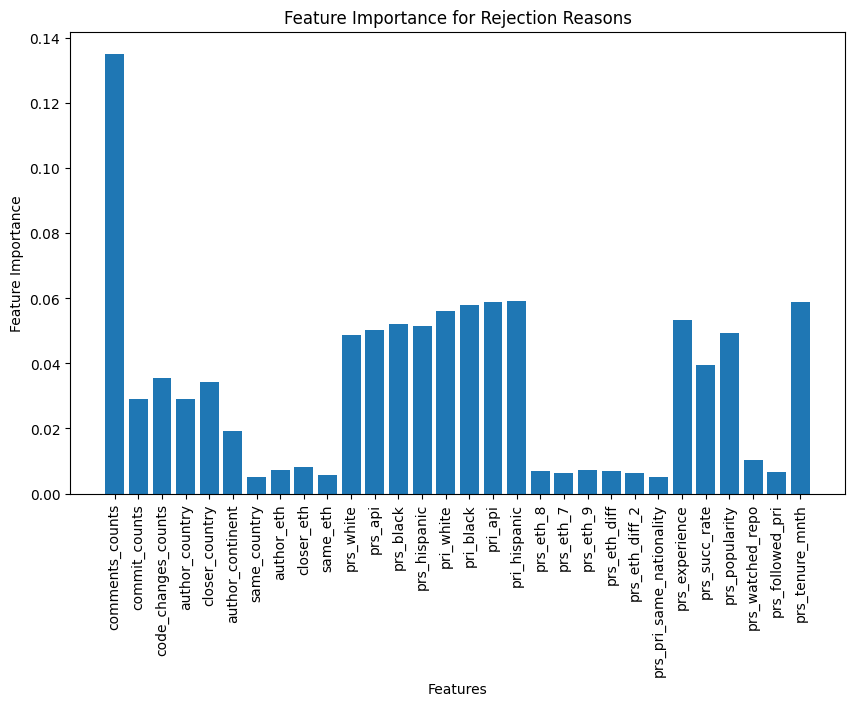

In [138]:
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Rejection Reasons')
plt.xticks(rotation=90)
plt.show()